## Nonlinear supervised learning series

# Two views of mathematical functions


In this notebook we start off on our journey towards understanding the fundamentals of nonlinear supervised learning, and the main tools used to tackle such problems. In part 1 of the nonlinear supervised learning series we focus on flushing out two basic ways of viewing a mathematical function, and how these views relate fundamentally to the problem of nonlinear supervised learning. This understanding helps frame and motivate the use of <b>function approximators</b> - that is kernels, neural networks, and decision trees - introduced in the notebook following this one.

In [1]:
# run this cell to import all necessary libraries for the notebook experiments
import custom_plotter 
import numpy as np

# 1.  Mathematical functions

Here we discuss a number of fundamental concepts regarding mathematical functions that will be very useful in our future discussions of nonlinear supervised learning. This includes two common ways of viewing mathematical functions: as an algebraic equation or formula, and as a table of values (or collection of data).

## 1.1  The equation view

In secondary school math classes you learn about all sorts of mathematical functions: lines, parabolas, polynomials, sine waves, etc. A function is just a rule for transforming inputs into an associated set of outputs - like a recipe which tells you how to transform ingredients into a useful product.
One of the primary ways we are taught to think about mathematical functions is via their **equation** or **formula**. For example, take the commonly taught equation of a line

<p>$$ y = w_0 + w_1x$$</p>

This is an explicitly written rule for taking an input $x$ and transforming it into an associated output $y$ . Given a specific input $x$ how do we transform it to get its associated output? According to the equation of the line, we simply multiply the input by the weight $w_1$ and add the weight $w_0$.

In the next cell we plot a picture of this equation/rule. Here we have set  $w_0=−3$  and  $w_1=2$  to create one instance of a line shown in red, plotted over the input range (values of $x$) from $-5$ to $5$.

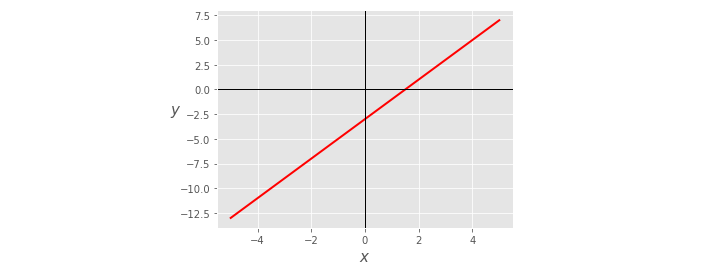

In [2]:
# specify range of input for our function
x = np.linspace(-5,5,50)

# set the weights
w_0 = -3
w_1 = 2

# form the equation
y = w_0 + w_1*x

# make a table of values for our function
line_table = np.stack((x,y), axis=1)  

# use custom plotter to display function
custom_plotter.single_plot(table = line_table)

Another common function we learn about in secondary school is the **parabola**. To get a parabola we just square the input $x$, mutilply it by a weight $w_2$, and add it to the line above

<p>$$y = w_0 + w_1x + w_2x^2$$</p>

Again we can plot a parabola with explicit values for the weights $w_0$, $w_1$, and $w_2$. In the next cell we set $w_0=−3$, $w_1=2$, and $w_2=1$, and plot the parabola over the same input range (values of $x$) as the line.

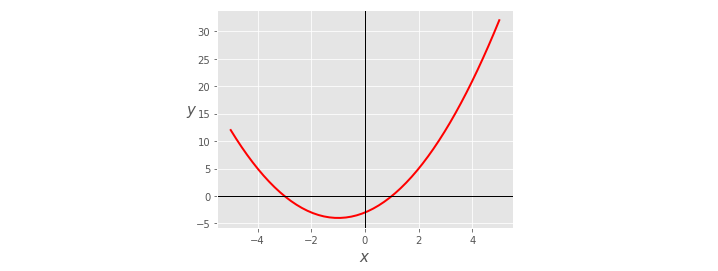

In [3]:
# specify range of input for our function
x = np.linspace(-5,5,50)

# set the weights
w_0 = -3
w_1 = 2
w_2 = 1

# form the equation
y = w_0 + w_1*x + w_2*x**2

# make a table of values for our function
parabola_table = np.stack((x,y), axis=1)

# use custom plotter to display function
custom_plotter.single_plot(table = parabola_table)

Writing down the equation of the line, parabola, or any other function gives us its rule - its recipe for transforming inputs into outputs. This is what we call the equation view of a mathematical function.

>One valid way to think about a function is through its equation, that is, its explicitly defined rule for transforming inputs into outputs. We call this **the equation view** of a mathematical function.

## 1.2  The table view

Another way to think about a function is to view it as the actual set of input/output pairs defined by its equation, or in other words, as a table of values. This is how we actually graph functions like the ones above: we plug in various input values into the function's equation, find their corresponding output values and print the results.

For example, for the line

<p>$$y = w_0 + w_1x$$</p>

that we plotted previously with $w_0=−3$ and $w_1=2$, this table of values looks like

<br>
<table>
    <thead style="background-color: #eee;">
        <tr>
            <th>input: &nbsp;$x$</th>
            <th>output: &nbsp;$y$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$0$</td>
            <td class="centered">$-3$</td>
        </tr>
        <tr>
            <td class="centered">$-0.4$</td>
            <td class="centered">$-3.8$</td>
        </tr>
        <tr>
            <td class="centered">$2.8$</td>
            <td class="centered">$2.6$</td>
        </tr>
        <tr>
            <td class="centered">$-1$</td>
            <td class="centered">$5$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

The vertical dots in each colunm indicate that we could keep on listing off input and output pairs (in no particular order). So in theory, we can find - somewhere on this infinitely long table - the corresponding output value for any input number we can think of.

When we take the table view of a function we view it as a (possibly infinitely long) listing of explicit input/output pairs, not as its equation. In other words, we think of the function as a collection of input/output data points.

As with the line, we can also view a parabola either as its equation (equation view) or as its associated table of values (table view). For the choice of weights we used previously, the table view of our parabola looks like

<br>
<table>
    <thead style="background-color: #eee;">
        <tr>
            <th>input: &nbsp;$x$</th>
            <th>output: &nbsp;$y$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$0$</td>
            <td class="centered">$-3$</td>
        </tr>
        <tr>
            <td class="centered">$-0.4$</td>
            <td class="centered">$-1.56$</td>
        </tr>
        <tr>
            <td class="centered">$2.8$</td>
            <td class="centered">$10.44$</td>
        </tr>
        <tr>
            <td class="centered">$-1$</td>
            <td class="centered">$-4$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

Once again the three vertical dots in each column indicate that this list is infinitely long. Any input value we can think of will be found at some point on this table, along with its associated output.

>Another way to think about a function is as an infinitely long table of explicit input/output values. We call this **the table view** of a mathematical function. 

Using a subset of these table values we can visualize functions with one or two inputs by plotting their graphs. Notice that the plots produced this way (and shown previously) are not *continuous*, although they appear so. Those plots we made above are actually kind of a trick - an optical illusion. If you look closely you can see that we only *sampled* input/output data points for each function's table. That is, we did not plot all infinitely many, just a small subset of them. The plots however *look* continuous - the way we might draw them using pencil and paper - because we used the <code>plot</code> function from Python's matplotlib library which interpolates smoothly between points it plots. If we use <code>scatter</code> to plot the data instead you can really see all the input/output points we defined individually. We do this in the next Python cell.

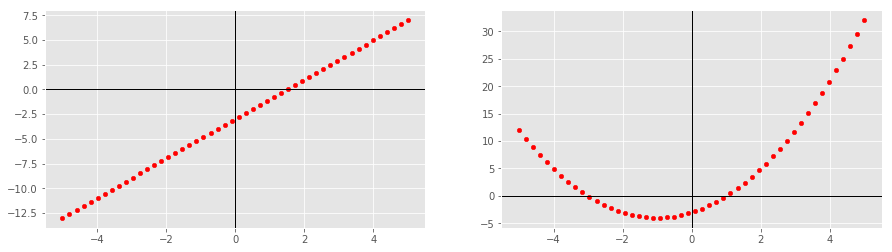

In [4]:
# specify range of input for our functions
x = np.linspace(-5,5,50)    

# generate line table
w_0 = -3
w_1 = 2
y = w_0 + w_1*x
line_table = np.stack((x,y), axis=1) 

# generate parabola table
w_0 = -3
w_1 = 2
w_2 = 1
y = w_0 + w_1*x + w_2*x**2
parabola_table = np.stack((x,y), axis=1) 

# use custom plotter to show both functions
custom_plotter.double_plot(table1 = line_table, table2 = parabola_table)

## 1.3  Higher dimensions: same deal

The duality of viewing a function via its equation or its table of values, holds regardless of how many inputs our function has. For example, a line that takes in two inputs ($x_1$ and $x_2$ instead of just $x$) is usually called a *plane* or *hyperplane*, and its equation generally takes the form

<p>$$w_0 + w_1x_1 + w_2x_2 = y$$</p>

where $w_0$ , $w_1$, and $w_2$ are tunable weights. For any particular set of weights we can write out a table of values, and plot it (this time in 3d). For example, if we set $w_0=3$, $w_1=−2$, and $w_2=0.5$, we can create a table of values like this

<br>
<table>
    <thead style="background-color: #eee;">
        <tr>
            <th>input: &nbsp;$(x_1,x_2)$</th>
            <th>output: &nbsp;$y$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$(0,0)$</td>
            <td class="centered">$3$</td>
        </tr>
        <tr>
            <td class="centered">$(1,2)$</td>
            <td class="centered">$2$</td>
        </tr>
        <tr>
            <td class="centered">$(3.14,1.6)$</td>
            <td class="centered">$4.88$</td>
        </tr>
        <tr>
            <td class="centered">$(-1,1)$</td>
            <td class="centered">$-4$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

or plot a shortened list of its table of values as in the next Python cell.

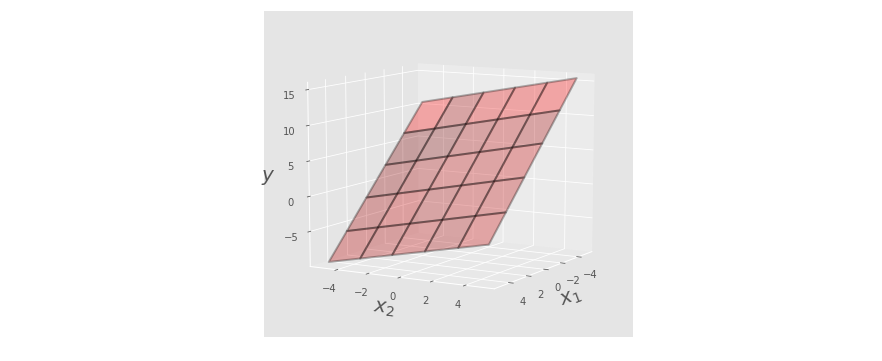

In [5]:
# specify range of input for for x1 and x2
s = np.linspace(-5,5,50)                  
x_1, x_2 = np.meshgrid(s,s)

# set the weights
w_0 = 3
w_1 = -2
w_2 = 0.5

# form the equation
y = w_0 + w_1*x_1 + w_2*x_2

# make a table of values for our function
line_table = np.stack((x_1,x_2,y), axis=1)  

# use custom plotter to display function
custom_plotter.single_plot(table = line_table)

A higher dimensional parabola works analagously. The general equation with 2 inputs takes the form

<p>$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2$$</p>

For any weight setting we can write out a table of values, or plot a small section of the table as in the next Python cell, where we have set $w_0=3$, $w_1=−2$, $w_2=0.5$, $w_3=1.3$, $w_4=−0.3$, and  $w_5=4$.

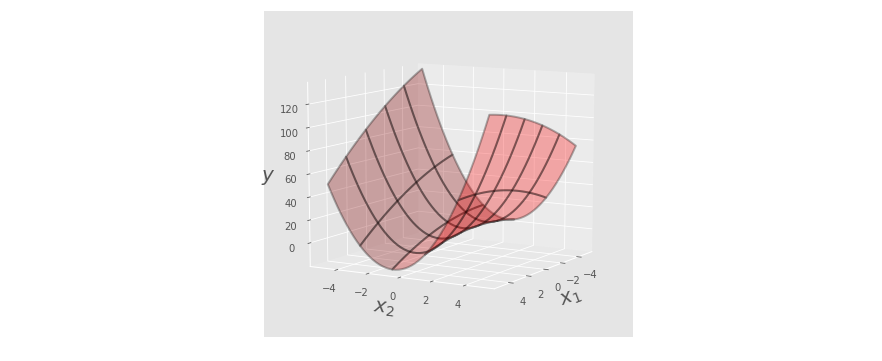

In [6]:
# specify range of input for for x1 and x2
s = np.linspace(-5, 5, 50)                 
x_1, x_2 = np.meshgrid(s, s)

# set the weights
w_0 = 3
w_1 = -2
w_2 = 0.5
w_3 = 1.3
w_4 = -0.3
w_5 = 4

# form the equation
y = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1*x_2 + w_4*x_1**2 + w_5*x_2**2

# make a table of values for our function
parabola_table = np.stack((x_1,x_2,y), axis=1)  

# use custom plotter to display function
custom_plotter.single_plot(table = parabola_table)

## 1.4  Which view of a function is best?

If we could only choose one, which would we rather have: the equation of a function or a table consisting of all its input/output pairs?

Well, if we had the equation we could always generate its associated table of input/output values. So that is a big plus to having the equation - if we have it we can get the table for free. How about the reverse? If we had a table of values, could we intuit its equation easily? In other words, if we have the table do we get the equation for free?

Well, by just examining a function's raw table it is not exactly obvious how to draw conclusions vis-a-vis its associated equation. That is, just eye-balling a raw table like this one 

<br>
<table>
    <thead style="background-color: #eee;">
        <tr>
            <th>input: &nbsp;$x$</th>
            <th>output: &nbsp;$y$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td class="centered">$0$</td>
            <td class="centered">$-3$</td>
        </tr>
        <tr>
            <td class="centered">$-0.4$</td>
            <td class="centered">$-1.56$</td>
        </tr>
        <tr>
            <td class="centered">$2.8$</td>
            <td class="centered">$10.44$</td>
        </tr>
        <tr>
            <td class="centered">$-1$</td>
            <td class="centered">$-4$</td>
        </tr>
        <tr>
            <td class="centered">$\vdots$</td>
            <td class="centered">$\vdots$</td>
        </tr>
    </tbody>
</table>
<br>

might not lead us to any useful conclusions regarding an equation.

But we could plot the table of values, or some portion of it, as we have been doing so far. Using the plot we could then try to determine the equation 'by eye'. That would probably be much easier than just looking at a table of numbers. Let's plot a few examples and see if this is do-able. See if you can guess the equation associated with each. After you have made your guess you can scroll down a bit to see the associated equations.

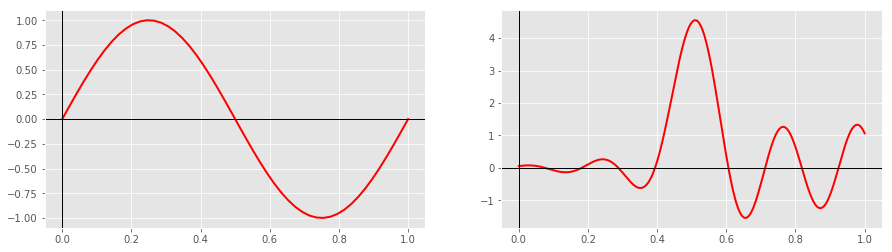

In [7]:
# load in table of values for two functions
first_table = np.loadtxt('../../datasets/guess_this_1.txt', delimiter=',')
second_table = np.loadtxt('../../datasets/guess_this_2.txt', delimiter=',')

# use custom plotter to show both functions
custom_plotter.double_plot(table1 = first_table, table2 = second_table,plot_type = 'continuous')

Having plotted the table of values for both functions, you may have been able to spot the equation for the example on the left. It is in fact

<p>$$y=\text{sin}(2\pi x)$$</p>

Did you correctly guess 'sine' for this one? You might have missed the $2\pi$ factor on the inside - but close enough. Great work!

How about the second example on the right? This one is a little more challenging. If somehow you guessed the equation associated to this table of values, which is

<p>$$y = e^{3x}\frac{\text{sin}(3\pi^2 (x-0.5))}{3{\pi}^2(x-0.5)}$$</p>

then you definitely deserve a pat on the back! Regardless, wouldn't you agree that this one is much harder?

The point here is that even when we only have a *single* input, identifying a function's equation by plotting its table of values is very difficult to do 'by eye'. And it is worth emphasizing again that we could only even attempt this for functions of one or two inputs, since we can't meaningfully visualize functions that take in three or more inputs - they are too high dimensional! 

So in general we can't just look at a table of values - whether in the raw or by graphing it - and hope to accurately guess at the associated equation. Is there another way to accurately estimate the equation of a table? There is, and it is the basis for all nonlinear machine learning. It is called **function approximation**, a topic we investigate at length starting in the next notebook.

>If we have a function's equation we can always generate its associated table of values effortlessly, however the reverse is not so straight forward. That is, given a table of values it is not yet clear how, in general, we can infer an associated equation. In this important sense, the equation view of a function outstrips the table view, and is superior.

## 1.5  What does all this have to do with supervised learning?

We can describe supervised learning, that is regression and classification, directly in terms of our two views of functions: the aim of supervised learning is to recover the equation of a function based on noisy samples of its table of values.

>In terms of our two views of functions, the aim of supervised learning is to recover the equation of a function based on *noisy* samples of its table of values.

In other words, with supervised learning we have a table of values representing a function. But the values we are given are (likely) noisy, and we have a limited supply of them. This factoid is illustrated figuratively in the animation below for one particular regression dataset.

<p><img src="../../images/regr_to_func_approx.gif" width=300 height=300/></p>

The GIF begins by illustrating a prototypical nonlinear regression dataset consisting of a small sample of sinusoidal input/output pairs, with noise being added to the output. 'Noise' here means that each point has been nudged a little above, or below, where the true function is.

The next slide in the animation then shows the same dataset, only with the noise removed. The points drop down or raise up to the true sinusoidal function. While the regression dataset table of values contained noisy samples of the true function, each of the values in this table are now true input/output pairs. But we still only have a small sample of all such pairs. The final slide in the animation fills out the table completely and shows the true, underlying function table of values.

Up next, an analagous animation for two-class classification. Everything here is entirely similar to the regression case animated above, shown for one particular nonlinear classification dataset. This is because classification is a regression problem, one where our output *is* constrained to strictly take on discrete values. 

<p><img src="../../images/class_to_func_approx_2d_slow.gif" width=350 height=300/></p>

<p><img src="../../images/class_to_func_approx_3d.gif" width=400 height=300/></p>

In the first slide of the animations we see a prototypical classification dataset - a noisy table of values - from both 'above' (in the top GIF) and 'the side' (bottom GIF). Note that with classification a point is 'noisy' if it is mislabeled, that is if its label takes on the wrong discrete value. So, a noisy point here is one that - if on the bottom step, should be on the top - and vice versa.

In the next slide of the animation we remove noise from all points, so every point now lies on its correct level. At this point we have a clean sample of table values for our function, but only a subset of them.

Finally we transition to the final slide, showing the complete table of values for our desired function. The difference between this and the final slide of the regression GIF, is that with classification we deal with **discontinuous step functions** which can have linear or nonlinear boundaries between their steps.

## 1.6  What is next?

Finding the equation of a complete, noise-free table of values is challenging as we discussed in Section 1.4. Supervised learning is just doing this - finding an equation - only our table of values (our data) is finite and much smaller, and is potentially noisy. It then stands to reason that supervised learning must be a harder task. But if don't even know how to tackle the former problem yet (the one that seems easier), how can we hope to tackle the latter?

In the next post we start off by introducing the tools needed to accurately determine the equation of a function given its complete table of values. We will then see, because supervised learning is so similar in concept to this problem, that we can carry over the exact same set of tools to tackle supervised learning. This toolset is called **function approximation**, and is where (perhaps familiar) terms like **kernels**, **neural networks**, and **decision trees** enter the picture.

<blockquote style="border-left: 5px solid; border-left-color: #ccc; background: white;"><p>The content of this notebook is supplementary material for the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit <a href="http://mlrefined.com">http://mlrefined.com</a> for free chapter downloads and tutorials, and <a href="https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&amp;qid=1474491657&amp;sr=8-1&amp;keywords=machine+learning+refined">our Amazon site</a> for details regarding a hard copy of the text.</p>
</blockquote>